# Advanced Pandas & Intro to Matplotlib

# <font color='red'>Goals</font>
### The goals of todays lecture is to explore:
##### 1. More advanced Pandas subfunctions
##### 2.  More advanced Matplotlib Plots
#### 3. How Pandas and Matplot lib can be utilized together

In [50]:
#load libraries
import pandas as pd
import numpy as np

# Working with missing data in Pandas

Pandas uses 'NaN' (not a number) as its default missing value representation. Missing data is considered values in a dataset that is not present. **We must explicitly tell Pandas what we are calling a missing value.**

In [51]:
df2 = pd.DataFrame({'a':[1,2,3,4,5],'b':[10,'NaN',30,40,50],'c':[100,200,'NaN','NaN',500],'d':['NaN','NaN','NaN',4000,5000]})

In [52]:
# Count the number of missing values in Each row
df2['Missing_Values'] =df2.isnull().sum(axis=1)
print(df2.head())
print(df2.isnull()) 

##why didn't this work???

   a    b    c     d  Missing_Values
0  1   10  100   NaN               0
1  2  NaN  200   NaN               0
2  3   30  NaN   NaN               0
3  4   40  NaN  4000               0
4  5   50  500  5000               0
       a      b      c      d  Missing_Values
0  False  False  False  False           False
1  False  False  False  False           False
2  False  False  False  False           False
3  False  False  False  False           False
4  False  False  False  False           False


In [53]:
##Null needs to be specified!
# We can use the numpy to explicitly do so

df2 = df2.replace('NaN',np.nan)
print(df2.head())
print('\n')
print(df2.isnull())

   a     b      c       d  Missing_Values
0  1  10.0  100.0     NaN               0
1  2   NaN  200.0     NaN               0
2  3  30.0    NaN     NaN               0
3  4  40.0    NaN  4000.0               0
4  5  50.0  500.0  5000.0               0


       a      b      c      d  Missing_Values
0  False  False  False   True           False
1  False   True  False   True           False
2  False  False   True   True           False
3  False  False   True  False           False
4  False  False  False  False           False


In [54]:
#Create a new column and sum the number of missing values across the row
df2['Missing_Values'] =df2.isnull().sum(axis=1)
print(df2)

   a     b      c       d  Missing_Values
0  1  10.0  100.0     NaN               1
1  2   NaN  200.0     NaN               2
2  3  30.0    NaN     NaN               2
3  4  40.0    NaN  4000.0               1
4  5  50.0  500.0  5000.0               0


In [55]:
#Review
#How would we sum the missing values in a column and create a new row called missing_cols?

# More Advanced Data Wrangling in Pandas


PANDAS provides various facilities for easily combining together Series, DataFrame, & other objects with various kinds of set logic for the indexes and relational functionality in the case of join / merge-type operations.

# <font color='red'> Concatenating Dataframes </font>


**Concat**:  concat function in Pandas is used to append either columns or rows from one DataFrame to another. When we concatenate our DataFrames we simply add them to each other - stacking them either vertically or side by side.


### <font color='blue'> Concat Example </font> 

In [56]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [57]:
raw_data2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data2, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [58]:
raw_data3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data3, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [59]:
# concatenate 2 dataframes along rows
df_byrow = pd.concat([df_a, df_b],ignore_index=True)

df_byrow

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [60]:
# join two datarames along columns
df_bycol = pd.concat([df_a, df_b], axis=1)
df_bycol

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


## <font color='red'> Merging Dataframes </font>


**Merge**:  Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique id). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other.

<img src='./Images/initialiDF.jpg'>

<img src="./images/merge_PD.jpg">

In [61]:
# merge example
pd.merge(df_a, df_b,left_on='subject_id',right_on='subject_id',how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


# Groupby

1.  Groupby  splits the data into different groups depending on a variable of your choice
2. A GroupBy object .groups variable is a dictionary whose keys are the computed unique groups with corresponding values being the axis labels belonging to each group. 
3. This groups variable allows for access to the object similar to what we've seen before with Pandas

In [62]:
#read in the file; note we explicitly call the index to be the column of this file named 'country'
drinks = pd.read_csv('http://bit.ly/drinksbycountry',index_col='country')

In [63]:
#inspect the dataframe
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [64]:
# using .groupby function to see the beer serving mean by continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

 <img src='./Images/splitapplycombine.png'>

The groupby method is a function that splits by a variable, applies a function to each group and combines the results.

In [65]:
# max number of beer servings by continent
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [66]:
#Aggregate findings using the .agg argument
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max'])

,count,min,max
continent,,,
Africa,53,0,376
Asia,44,0,247
Europe,45,0,361
North America,23,1,285
Oceania,16,0,306
South America,12,93,333


In [67]:
#Groupby Example 2
iris = pd.read_csv('./IRIS.csv')

In [68]:
#apply groupby
iris_groups = iris.groupby('species')
#we can look at the grouping more carefully by looking at the indices
print(iris_groups.indices)

{'setosa': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'versicolor': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), 'virginica': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])}


In [69]:
#we can look at the group values
iris_groups.indices.values()

dict_values([array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])])

In [70]:
#iterate through the groupby object
for k,v in iris_groups:
    print('New Group \n')
    print (k)
    print (v)
    print ('End of Group \n')

New Group 

setosa
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14    

In [71]:
#get a group!
Setosa=iris_groups.get_group('setosa')

# Working with Text 

Pandas objects are equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically.<br></br> These are accessed via the **str** attribute and generally have names matching the equivalent (scalar) built-in string methods. Pandas can also accept regular expressions.



In [72]:
##UpperCase example
drinks.continent.str.upper();

In [73]:
drinks['ContinentName_length'] = drinks.continent.apply(len) # note the axis is default
print(drinks.head())

             beer_servings  spirit_servings  wine_servings  \
country                                                      
Afghanistan              0                0              0   
Albania                 89              132             54   
Algeria                 25                0             14   
Andorra                245              138            312   
Angola                 217               57             45   

             total_litres_of_pure_alcohol continent  ContinentName_length  
country                                                                    
Afghanistan                           0.0      Asia                     4  
Albania                               4.9    Europe                     6  
Algeria                               0.7    Africa                     6  
Andorra                              12.4    Europe                     6  
Angola                                5.9    Africa                     6  


Another Example of working with text in Pandas

In [74]:
#specify the columns
interested = ['Team','SV%','GA','GAA','GP']
#Read in the NHL Goalies dataframe
NHL_goalies=pd.read_excel('./NHLGoalies2016_2017.xls',sheetname=0,usecols=interested)
Mean_Goalies=NHL_goalies.groupby('Team').mean()
print(Mean_Goalies.head())

             GP         GA       SV%       GAA
Team                                          
ANA   30.666667  64.000000  0.946542  1.571734
ARI   22.500000  61.500000  0.899224  3.256817
BOS   22.500000  50.250000  0.872294  3.682400
BUF   28.666667  73.666667  0.920024  2.803587
CAR   17.400000  44.400000  0.735465  1.750629


In [75]:
print(Mean_Goalies.index.value_counts())

PHI         1
ANA         1
CHI         1
DAL         1
BOS         1
NJD         1
OTT         1
WSH         1
CBJ, TOR    1
SJS         1
BUF         1
STL         1
ARI         1
NSH         1
PIT, OTT    1
PIT         1
MIN         1
NYR         1
NYI         1
FLA         1
COL         1
LAK, TBL    1
CGY         1
DET         1
TBL, LAK    1
CBJ         1
LAK         1
VAN         1
MTL         1
EDM         1
WPG         1
TOR         1
TBL         1
CAR         1
Name: Team, dtype: int64


In [76]:
#Get rid of Goalies that were in 2 teams
NHL_goalies['Number_of_Teams']= NHL_goalies.Team.str.count(',')+1
print(NHL_goalies.head())

  Team  GP   GA       SV%       GAA  Number_of_Teams
0  STL  61  138  0.914815  2.422245                1
1  CAR   1    0  0.000000  0.000000                1
2  TOR  66  169  0.917641  2.668889                1
3  OTT  40   92  0.926223  2.279830                1
4  VAN   5   13  0.919753  2.642426                1


In [77]:
#sorting columns
NHL_goalies.sort_values('GA', axis=0, ascending=False)

,Team,GP,GA,SV%,GAA,Number_of_Teams
88,EDM,73,171,0.919225,2.389381,1
2,TOR,66,169,0.917641,2.668889,1
82,NJD,60,163,0.908478,2.816144,1
93,CAR,61,162,0.905319,2.686629,1
84,ARI,55,156,0.914239,2.923051,1
44,SJS,65,152,0.911884,2.399779,1
51,BUF,59,152,0.920419,2.678047,1
52,DAL,59,151,0.902329,2.851612,1
63,VAN,54,150,0.913644,2.802123,1
55,NYR,57,148,0.910303,2.740374,1


# Applying functions in Pandas

*Invoke function on values of Series. Can be user defined function or a NumPy function that applies to the entire Serie. Defined Python functions should only be ones that apply on single value. It also supports Lambda Functions which are anonymous functions (i.e. functions that are not bound to a name).*

In [78]:
def per_60(goalnumber):
    """ function that returns the goals allowed per 60 minutes"""
    return goalnumber/60

In [79]:
#as your own function specifying the column
NHL_goalies['newcolumn'] = NHL_goalies.GA.apply(per_60)
NHL_goalies.head()

,Team,GP,GA,SV%,GAA,Number_of_Teams,newcolumn
0,STL,61,138,0.914815,2.422245,1,2.300000
1,CAR,1,0,0.000000,0.000000,1,0.000000
2,TOR,66,169,0.917641,2.668889,1,2.816667
3,OTT,40,92,0.926223,2.279830,1,1.533333
4,VAN,5,13,0.919753,2.642426,1,0.216667


In [80]:
#as a lambda; same as the function per_60
NHL_goalies['newcolumn2'] = NHL_goalies.apply(lambda x: x['GA']/60,axis=1)
NHL_goalies.head()

,Team,GP,GA,SV%,GAA,Number_of_Teams,newcolumn,newcolumn2
0,STL,61,138,0.914815,2.422245,1,2.300000,2.300000
1,CAR,1,0,0.000000,0.000000,1,0.000000,0.000000
2,TOR,66,169,0.917641,2.668889,1,2.816667,2.816667
3,OTT,40,92,0.926223,2.279830,1,1.533333,1.533333
4,VAN,5,13,0.919753,2.642426,1,0.216667,0.216667


In [ ]:
#write out a dataframe
NHL_goalies.to_csv('Modified_NHL.txt',sep='\t',na_rep=np.nan)

# More Matplotlib

We've already introduced that matplotlib allows for customization via its containers (axes,figure,subplot etc). Here we discuss pre-built style options and histograms/barplots/pie charts.

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Histograms are useful in any case where you need to examine the statistical distribution over a variable.It works by taking a list of numbers, binning those numbers within a number of ranges, and counting the number of occurrences in each bin.

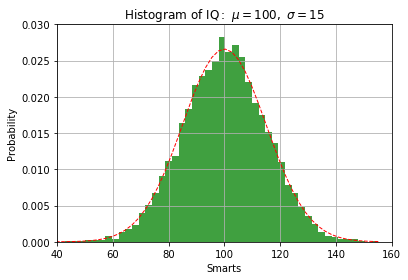

In [82]:
#directly from 
#https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)


In [101]:
#here we use numpy to generate a normal distribution
#we can then take a look at a histogram style options
from numpy.random import normal
gaussian_numbers = normal(size=1000)
#check out available styles
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


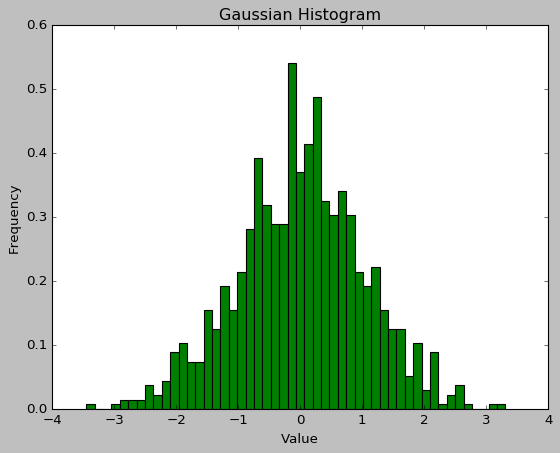

In [103]:
plt.style.use('classic')
plt.hist(gaussian_numbers,color='green',bins=50,normed=True)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

### NumPY/PANDAS/Matplotlib work coherently together!
#### Pandas dataframes have access to the plot sub-functions for <font color='red'> quick plotting</font>

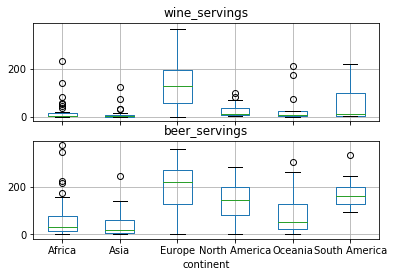

In [83]:
#Create a subset of Drinks DF that visualizes beer and wine_servings by continent
params = tuple([2,1])
drinks.boxplot(column=['wine_servings','beer_servings'],by='continent',layout=params)
plt.suptitle("") # remove the autogenerated figure title

In [84]:
#drop length of continent column
drinks.columns.tolist()

['beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol',
 'continent',
 'ContinentName_length']

In [85]:
#Drop the column from the Original DF
drinks.drop(['ContinentName_length'], axis = 1, inplace = True)

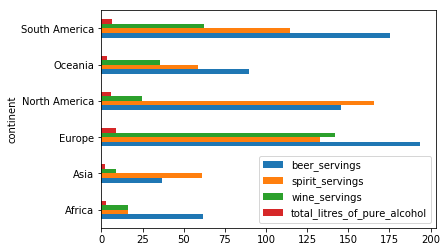

In [86]:
#plot
data = drinks.groupby('continent').mean()
#horizontal bar (barh)
data.plot(kind='barh') 

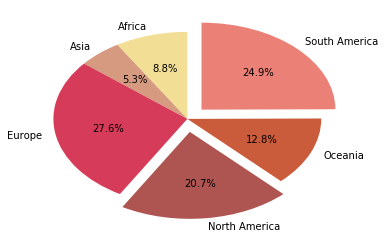

In [89]:
#pie chart
# see sites like http://www.color-hex.com/
colors = ["#F2DF95", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]

# Create a pie chart
plt.pie(
    # using beer servings
    data['beer_servings'],
    # with the labels being the index values(continents)
    labels=data.index,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0.15, 0,0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.show()

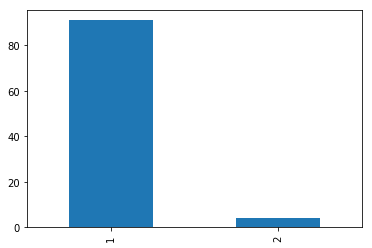

In [88]:
#from before
f = NHL_goalies.Number_of_Teams.value_counts()
f.plot(kind='bar')